### Training Iris-Klassifikation
Demonstriert Implementation von Backpropagation ohne Framework

In [50]:
# from https://www.askpython.com/python/examples/backpropagation-in-python
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Trainingsdaten vorbereiten 
Sklearn bietet eine Funktion zum Splitten der Daten in Trainings-, Validation- und Testdatenmenge. Ebenso kann man den Iris-Datensatz bequem einladen.

In [51]:
iris = load_iris()

# split Dataset in Training and Testing, parameters: the features (input), target, and size of the test set.
X_train, X_test, y_train_classes, y_test_classes = train_test_split(iris.data, iris.target, test_size=20, random_state=4)# Loading dataset


In [52]:
print("Merkmale: ",iris.feature_names)
print("Number of flowers:",iris.target.size)

# Kodierschema 0 = setosa, 1 = versicolor, 2 = virginica
print("Klassennamen: ",iris.target_names)
# 0, 1, und 2 repäsentieren die unterschiedlichen Spezies
print("Labels: ",iris.target)

Merkmale:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of flowers: 150
Klassennamen:  ['setosa' 'versicolor' 'virginica']
Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


__Umformatieren__ der Ausgabedaten für One-Hot-Encoding

In [53]:
y_train_list=[]
for t in y_train_classes:
    if t==2:
        y_train_list+=[[0,0,1]]
    if t==1:
        y_train_list+=[[0,1,0]]
    if t==0:
        y_train_list+=[[1,0,0]]

y_train=np.array(y_train_list)
N = y_train.size

y_test_list=[]
for t in y_test_classes:
    if t==2:
        y_test_list+=[[0,0,1]]
    if t==1:
        y_test_list+=[[0,1,0]]
    if t==0:
        y_test_list+=[[1,0,0]]

y_test=np.array(y_test_list)

print(y_train[1:10])

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]]


### Neuronales Netz erstellen

In [54]:
# Hyperparameters
learning_rate = 0.1
iterations = 5000
 
input_size = 4
hidden_size = 2
output_size = 3 

# Output data 
results = pd.DataFrame(columns=["mse", "accuracy"])

In [55]:
# Zufällige Gewichte
np.random.seed(10)
 
# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
 
# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 


In [56]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
 # Loss
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
# True-Positiv?
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

### Training

In [63]:
rows=[]
for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    net1 = np.dot(X_train, W1)
    h1 = sigmoid(net1)
 
    # Implementing feed forward propagation on output layer
    net2 = np.dot(h1, W2)
    y = sigmoid(net2)
         
    # Calculating the error
    mse = mean_squared_error(y, y_train)
    acc = accuracy(y, y_train)
    rows.append({"mse":mse, "accuracy":acc})
     
    # Backpropagation phase
    E2 = y - y_train
    dW2 = E2 * y * (1 - y)
    W2_update = np.dot(h1.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
 
    E1 = np.dot(dW2, W2.T)
    dW1 = E1 * h1 * (1 - h1)
    W1_update = np.dot(X_train.T, dW1) / N
    W1 = W1 - learning_rate * W1_update

acc

0.9153846153846154

### Ergebnisse

<AxesSubplot:title={'center':'Accuracy'}>

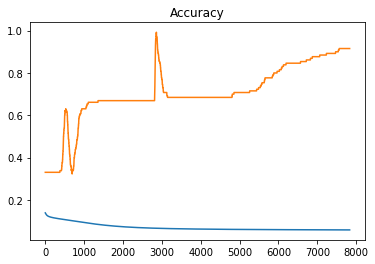

In [64]:
results = pd.concat([results, pd.DataFrame(rows)], axis=0, ignore_index=True)

# show error curve
results.mse.plot(title="Mean Squared Error")

# show accuracy curve
results.accuracy.plot(title="Accuracy")

In [66]:
# calculate the accuracy of the model
net1 = np.dot(X_test, W1)
h1 = sigmoid(net1)
 
net2 = np.dot(h1, W2)
y = sigmoid(net2)
 
acc = accuracy(y, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.9
